In [16]:
from include.generators import Generator
from treeconfigparser import TreeConfigParser
import matplotlib.pyplot as plt

In [4]:
config_file = "cfg/reg_PGIBPW_DA.cfg"
config = TreeConfigParser()
config.readfiles(config_file)

In [ ]:
data_gen_args = dict(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    shear_range=0,
    zoom_range=0,
)

image_datagen = keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
mask_datagen = keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
image_generator = image_datagen.flow(data.x.train, seed=seed, batch_size=32)
mask_generator = mask_datagen.flow(data.y.train, seed=seed, batch_size=32)

train_generator = zip(image_generator, mask_generator)

In [ ]:
x = image_generator.next()
y = mask_generator.next()
for i in range(0, 4):
    image = x[i]
    mask = y[i]
    axs = mympf.set_figure_axs(1, 3, pad_w_int=0.05, pad_h_int=0.05)
    axs[0].imshow(image[:, :, 0])
    axs[1].imshow(image[:, :, 1])
    axs[2].imshow(mask[:, :, 0])
    plt.show()

In [6]:
generator = Generator(config)

In [44]:
N_img=1
Ny = 32
Nx = 32
y, x = np.indices((Ny,Nx))

magni = np.random.uniform(0.2, 3, N_img).reshape(1,1,-1)
center_Y = np.random.uniform(0,Ny, N_img).reshape(1,1,-1)
center_X = np.random.uniform(0,Nx, N_img).reshape(1,1,-1)
var_Y = np.random.uniform(0,40, N_img).reshape(1,1,-1)
var_X = np.random.uniform(0,40, N_img).reshape(1,1,-1)

img = magni * np.exp(-0.5*((np.expand_dims(x, axis=-1)-center_X)**2/var_X 
                            + (np.expand_dims(y, axis=-1)-center_Y)**2/var_Y))

img = np.expand_dims(img,0)
dir_It = generator.trainData_generator.flow(img)

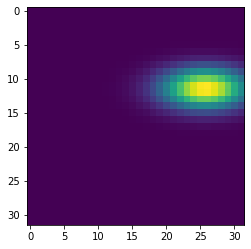

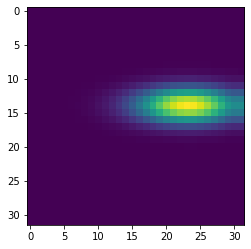

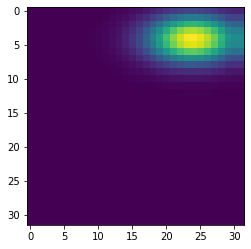

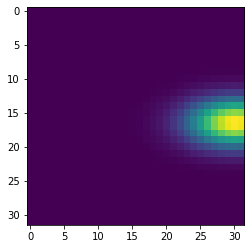

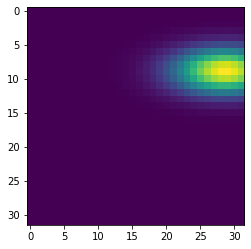

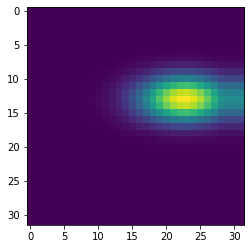

In [54]:
plt.imshow(np.squeeze(img))
plt.show()
for _ in range(5):
    img_gen = dir_It.next()
    plt.imshow(np.squeeze(img_gen))
    plt.show()